In [1]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

In [2]:
shap.initjs()

In [3]:
import sklearn
import shap
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:
df_ddate_scan = pd.read_csv ('../ddate/ddate_scan_cost.csv')
df_customer_scan = pd.read_csv ('../customer/customer_scan_cost.csv')
df_part_scan = pd.read_csv ('../part/part_scan_cost.csv')
df_supplier_scan = pd.read_csv ('../supplier/supplier_scan_cost.csv')

df_all_scan = df_ddate_scan
df_all_scan = df_all_scan.append(df_customer_scan)
df_all_scan = df_all_scan.append(df_part_scan)
df_all_scan = df_all_scan.append(df_supplier_scan)

print(df_all_scan)

          sel  index_cost  seq_cost relation_name  relation_size  index_size  \
0    0.142410       24.84     74.95         ddate         352256       73728   
1    0.285211       40.90     74.95         ddate         352256       73728   
2    0.142410       24.88     74.95         ddate         352256       73728   
3    0.142410       24.70     74.95         ddate         352256       73728   
4    0.714006       94.41     74.95         ddate         352256       73728   
..        ...         ...       ...           ...            ...         ...   
195  0.231500       27.38     58.00      supplier         270336       65536   
196  0.618000       65.91     58.00      supplier         270336       65536   
197  0.673500       73.85     58.00      supplier         270336       65536   
198  0.267500       33.64     58.00      supplier         270336       65536   
199  0.533500       59.95     58.00      supplier         270336       65536   

     row_size  y  
0        91.4  0  
1

In [36]:
df_all_scan['over'] = df_all_scan['index_size']/df_all_scan['relation_size']
df_all_scan['result_size'] = df_all_scan['sel'] * df_all_scan['relation_size']
df_all_scan

sel  index_cost  seq_cost relation_name  relation_size  index_size  \
0    0.142410       24.84     74.95         ddate         352256       73728   
1    0.285211       40.90     74.95         ddate         352256       73728   
2    0.142410       24.88     74.95         ddate         352256       73728   
3    0.142410       24.70     74.95         ddate         352256       73728   
4    0.714006       94.41     74.95         ddate         352256       73728   
..        ...         ...       ...           ...            ...         ...   
195  0.231500       27.38     58.00      supplier         270336       65536   
196  0.618000       65.91     58.00      supplier         270336       65536   
197  0.673500       73.85     58.00      supplier         270336       65536   
198  0.267500       33.64     58.00      supplier         270336       65536   
199  0.533500       59.95     58.00      supplier         270336       65536   

     row_size  y      over    result_size  
0        91.4  0  0.209302   50164.782596  
1        91.4  0  0.209302  100467.380421  
2        91.4  0  0.209302   50164.782596  
3        91.4  0  0.209302   50164.782596  
4        91.4  1  0.209302  251512.989123  
..        ... ..       ...            ...  
195     102.1  0  0.242424   62582.784000  
196     102.1  1  0.242424  167067.648000  
197     102.1  1  0.242424  182071.296000  
198     102.1  0  0.242424   72314.880000  
199     102.1  1  0.242424  144224.256000  

[800 rows x 10 columns]

In [45]:
from sklearn.model_selection import train_test_split

features = ['sel', 'relation_size','index_size', 'row_size']
features = ['sel', 'relation_size','index_size', 'row_size', 'over','result_size']
# features = ['sel']
X = df_all_scan[features].to_numpy()

# X [X == 'ddate'] = 1 
# X [X == 'customer'] = 2
# X [X == 'supplier'] = 3
# X [X == 'part'] = 4

X[:, 2] = X[:, 2]/ np.max(X[:, 2])
X[:, 1] = X[:, 1] / np.max(X[:, 1])
X[:, 1] = X[:, 3] / np.max(X[:, 3])
X[:, 1] = X[:, 4] / np.max(X[:, 4])

X[:, 5] = X[:, 5] / np.max(X[:, 5])

Y = df_all_scan['y'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
X

array([[1.42410016e-01, 8.63372093e-01, 1.63339383e-02, 9.14000000e+01,
        2.09302326e-01, 2.09478160e-03],
       [2.85211268e-01, 8.63372093e-01, 1.63339383e-02, 9.14000000e+01,
        2.09302326e-01, 4.19531809e-03],
       [1.42410016e-01, 8.63372093e-01, 1.63339383e-02, 9.14000000e+01,
        2.09302326e-01, 2.09478160e-03],
       ...,
       [6.73500000e-01, 1.00000000e+00, 1.45190563e-02, 1.02100000e+02,
        2.42424242e-01, 7.60293539e-03],
       [2.67500000e-01, 1.00000000e+00, 1.45190563e-02, 1.02100000e+02,
        2.42424242e-01, 3.01972564e-03],
       [5.33500000e-01, 1.00000000e+00, 1.45190563e-02, 1.02100000e+02,
        2.42424242e-01, 6.02251824e-03]])

# SHAP - SVM

In [46]:
import xgboost
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

# # use Kernel SHAP to explain test set predictions
# explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
# shap_values = explainer.shap_values(X_test, nsamples=100)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

Using 536 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [48]:
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test[5,:], link="logit")

In [49]:
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test[0,:], link="logit")

### Shap value on each feature

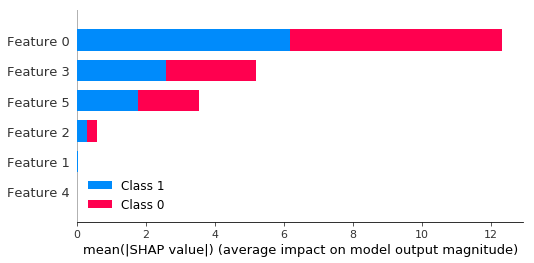

In [50]:
shap.summary_plot(shap_values, X)

### Shap value on each instance

In [10]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

In [12]:
from interpret.blackbox import MorrisSensitivity
from interpret import show
from interpret.provider import InlineProvider
from interpret import set_visualize_provider
set_visualize_provider(InlineProvider())
sensitivity = MorrisSensitivity(predict_fn=svm.predict_proba, data=X_train)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")

show(sensitivity_global)

In [44]:
from sklearn.neural_network import *
from interpret.perf import ROC
from interpret import show
svm_perf = ROC(svm.predict_proba).explain_perf(X_test, y_test, name='svm')
show(svm_perf)

# SHAP - MLP

In [51]:
from sklearn.model_selection import train_test_split

features = ['sel', 'relation_size','index_size', 'row_size']
X = df_all_scan[features].to_numpy()

# X [X == 'ddate'] = 1 
# X [X == 'customer'] = 2
# X [X == 'supplier'] = 3
# X [X == 'part'] = 4
X[:, 2] = X[:, 2]/ np.max(X[:, 2])
X[:, 1] = X[:, 1] / np.max(X[:, 1])
X[:, -1] = X[:, -1] / np.max(X[:, -1])

Y = df_all_scan['y'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
X

array([[0.14241002, 0.01469583, 0.01633394, 0.86145146],
       [0.28521127, 0.01469583, 0.01633394, 0.86145146],
       [0.14241002, 0.01469583, 0.01633394, 0.86145146],
       ...,
       [0.6735    , 0.0112782 , 0.01451906, 0.96229972],
       [0.2675    , 0.0112782 , 0.01451906, 0.96229972],
       [0.5335    , 0.0112782 , 0.01451906, 0.96229972]])

In [52]:
from sklearn.neural_network import *
from interpret.perf import ROC
from interpret import show
MLP = MLPClassifier(solver='lbfgs', alpha=1e-2, hidden_layer_sizes=(10, 10), random_state=1)
print("Train data: ", X_train, y_train)

MLP.fit(X_train, y_train)

MLP_perf = ROC(MLP.predict_proba).explain_perf(X_test, y_test, name='MLP')
show(MLP_perf)

Train data:  [[0.9855     0.0112782  0.01451906 0.96229972]
 [0.9626     0.17464115 0.15245009 1.        ]
 [0.197      0.0112782  0.01451906 0.96229972]
 ...
 [0.844      0.0112782  0.01451906 0.96229972]
 [0.14241002 0.01469583 0.01633394 0.86145146]
 [0.42206667 0.17464115 0.15245009 1.        ]] [1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 0 1 1 1 0 0

## Use LIME to explain MLP

In [10]:
#Blackbox explainers need a predict function, and optionally a dataset
lime = LimeTabular(predict_fn=MLP.predict_proba, data=X_train, random_state=1)
lime_local = lime.explain_local(X_test[:5], y_test[:5], name='LIME')

show(lime_local)

NameError: name 'LimeTabular' is not defined

In [77]:
from interpret.blackbox import ShapKernel
import numpy as np
blackbox_model = MLP
background_val = np.median(X_train, axis=0).reshape(1, -1)
shap = ShapKernel(predict_fn=blackbox_model.predict_proba, data=background_val, feature_names=features)
shap_local = shap.explain_local(X_test[:5], y_test[:5], name='SHAP')
show(shap_local)

In [78]:
from interpret.blackbox import MorrisSensitivity

sensitivity = MorrisSensitivity(predict_fn=blackbox_model.predict_proba, data=X_train)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")

show(sensitivity_global)

In [79]:
from interpret.blackbox import PartialDependence

pdp = PartialDependence(predict_fn=blackbox_model.predict_proba, data=X_train)
pdp_global = pdp.explain_global(name='Partial Dependence')

show(pdp_global)

# Tree classifier - glassbox

In [19]:
from interpret.glassbox import LogisticRegression, ClassificationTree
tree = ClassificationTree()
tree.fit(X_train, y_train)
tree_perf = ROC(tree.predict_proba).explain_perf(X_test, y_test, name='Classification Tree')
show(tree_perf)

In [20]:
from interpret.blackbox import MorrisSensitivity

sensitivity = MorrisSensitivity(predict_fn=tree.predict_proba, data=X_train)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")

show(sensitivity_global)

In [21]:
from interpret import set_show_addr
tree_global = tree.explain_global(name='Classification Tree')
show(tree_global)

# EBM - overall classification

In [15]:
from interpret import show
from interpret.data import ClassHistogram
from interpret.provider import InlineProvider
from interpret import set_visualize_provider

set_visualize_provider(InlineProvider())

hist = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
show(hist)

from interpret.glassbox import ExplainableBoostingClassifier, LogisticRegression, ClassificationTree, DecisionListClassifier

ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)   #Works on dataframes and numpy arrays

ExplainableBoostingClassifier(binning='quantile', early_stopping_rounds=50,
               early_stopping_tolerance=0,
               feature_names=['feature_0', 'feature_1', 'feature_2', 'feature_3'],
               feature_types=['continuous', 'continuous', 'continuous', 'continuous'],
               inner_bags=0, interactions=0, learning_rate=0.01,
               mains='all', max_bins=255, max_leaves=3, max_rounds=5000,
               min_samples_leaf=2, n_jobs=-2, outer_bags=16,
               random_state=42, validation_size=0.15)

In [16]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

In [17]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local)

In [18]:
from interpret.perf import ROC

ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

In [9]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(ebm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)
shap.summary_plot(shap_values, X)

Using 536 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


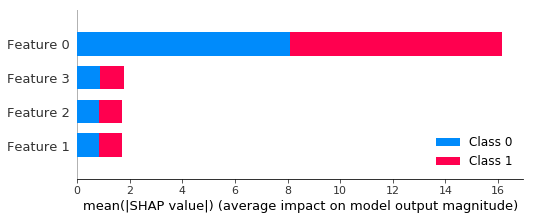

In [11]:
shap.summary_plot(shap_values, X)